# Task 1: Data Loading and Cleaning

a) Write a function load_data(file_path) that loads the CSV file into a pandas Data Frame.

b) Write a function clean_data(df) that:

▪ Checks for and handles any missing values.

▪ Ensures data types are appropriate for analysis.

In [ ]:
import pandas as pd
from datetime import datetime

In [ ]:

def load_data(file_path):
    return pd.read_csv(file_path)

# Function to clean data
def clean_data(df):
    # Initial columns print for debugging
    print("Initial columns:", df.columns)

    # Rename the columns based on their positions
    df.columns = ['Name', 'Birthdate', 'Price', 'Species', 'SpecialFeature', 'Extra']

    # Columns after renaming
    print("Columns after renaming:", df.columns)

    # Drop the last column
    df.drop(columns=['Extra'], inplace=True)

    # Columns after dropping 'Extra'
    print("Columns after dropping 'Extra':", df.columns)

    # Add a new column for PetID
    df.insert(0, 'PetID', range(1, 1 + len(df)))

    # Columns after adding 'PetID'
    print("Columns after adding 'PetID':", df.columns)

    return df


file_path = '/content/pets.csv'
df = load_data(file_path)
cleaned_df = clean_data(df)
print(cleaned_df)


Initial columns: Index(['140', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')
Columns after renaming: Index(['Name', 'Birthdate', 'Price', 'Species', 'SpecialFeature', 'Extra'], dtype='object')
Columns after dropping 'Extra': Index(['Name', 'Birthdate', 'Price', 'Species', 'SpecialFeature'], dtype='object')
Columns after adding 'PetID': Index(['PetID', 'Name', 'Birthdate', 'Price', 'Species', 'SpecialFeature'], dtype='object')
     PetID    Name   Birthdate   Price       Species   SpecialFeature
0        1    Luna   2/14/2020   57.81          Bird            flies
1        2   Simba    1/8/2022   36.23       Reptile     cold-blooded
2        3     Max   7/17/2021   46.94  Small Animal              yes
3        4  Ginger  11/21/2018  181.16           Dog         Foxhound
4        5  Shadow   3/12/2022   52.72           Cat         Burmilla
..     ...     ...         ...     ...           ...              ...
135    136  Peanut   5/25/

# Task 2: Decision Making and Loops

a) Write a function calculate_average_price(df, species) that:

▪ Takes the DataFrame and a species name as input.

▪ Returns the average price of pets in that species.

b) Write a function find_pets_with_feature(df, feature) that:

▪ Takes the DataFrame and a special feature value as input.

▪ Returns a list of names of pets with the specified special feature.

In [ ]:
def calculate_average_price(df, species):
    species_df = df[df['Species'] == species]
    if not species_df.empty:
        return species_df['Price'].mean()
    else:
        return 0.0

def find_pets_with_feature(df, feature):
    feature_df = df[df['SpecialFeature'] == feature]
    return feature_df['Name'].tolist()

# Calculate the average price for a specific species
average_price = calculate_average_price(cleaned_df, 'Dog')
print(f'Average price for dogs: {average_price}')

# Find pets with a specific special feature
pets_with_feature = find_pets_with_feature(cleaned_df, 'flies')
print(f'Pets with the feature "Breed": {pets_with_feature}')

Average price for dogs: 82.19666666666667
Pets with the feature "Breed": ['Luna', 'Bailey', 'Sadie', 'Thor', 'Bandit', 'Phoebe']


# Task 3: Functions and Modules

a) Write a function get_species_statistics(df) that:

▪ Returns a dictionary with species names as keys and their respective average prices and average ages as values..

Example output: {'Dog': {'Average Price': 500, 'Average Age': 3}, ...}

b) Write a module named pet_analysis.py and move all the above functions to this module.

c) Import this module into your main script and call the functions as needed.

In [ ]:
# Function to calculate the age from birthdate
def calculate_age(birthdate):
    try:
        birthdate = pd.to_datetime(birthdate, errors='coerce')
        if pd.isnull(birthdate):
            return None
        today = datetime.today()
        age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
        return age
    except Exception as e:
        print(f"Error calculating age for birthdate '{birthdate}': {e}")
        return None

# Function to calculate species statistics
def get_species_statistics(df):
    statistics = {}
    for species in df['Species'].unique():
        species_df = df[df['Species'] == species]
        average_price = species_df['Price'].mean()

        # Calculate average age
        species_df['Age'] = species_df['Birthdate'].apply(calculate_age)
        average_age = species_df['Age'].mean()

        statistics[species] = {'Average Price': average_price, 'Average Age': average_age}

    return statistics

In [ ]:
# Import module named pet_analysis.py into main script and call the functions

import pandas as pd
import pet_analysis as pa

# Load the data from the CSV file
file_path2 = '/content/pets.csv'
df2 = pa.load_data(file_path2)

# Clean the data
cleaned_df2 = pa.clean_data(df2)

# Check the Birthdate column before further processing
print("Sample Birthdates after cleaning:")
print(cleaned_df2['Birthdate'].head())

# Calculate the average price for a specific species
average_price = pa.calculate_average_price(cleaned_df2, 'Bird')
print(f"Average price of Birds: {average_price}")

# Find pets with a specific feature
pets_with_feature = pa.find_pets_with_feature(cleaned_df2, 'flies')
print(f"Pets with 'flies' feature: {pets_with_feature}")

# Get species statistics
species_statistics = pa.get_species_statistics(cleaned_df2)
print(f"Species statistics: {species_statistics}")


Initial columns: ['140', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5']
Columns after renaming: ['Name', 'Birthdate', 'Price', 'Species', 'SpecialFeature', 'Extra']
Columns after dropping 'Extra': ['Name', 'Birthdate', 'Price', 'Species', 'SpecialFeature']
Columns after adding 'PetID': ['PetID', 'Name', 'Birthdate', 'Price', 'Species', 'SpecialFeature']
PetID column successfully added.
Sample Birthdates after cleaning:
0     2/14/2020
1      1/8/2022
2     7/17/2021
3    11/21/2018
4     3/12/2022
Name: Birthdate, dtype: object
Average price of Birds: 92.23428571428573
Pets with 'flies' feature: ['Luna', 'Bailey', 'Sadie', 'Thor', 'Bandit', 'Phoebe']
Species statistics: {'Bird': {'Average Price': 92.23428571428573, 'Average Age': 3.0}, 'Reptile': {'Average Price': 92.57399999999998, 'Average Age': 3.5}, 'Small Animal': {'Average Price': 94.23020833333332, 'Average Age': 2.9791666666666665}, 'Dog': {'Average Price': 82.19666666666667, 'Average Age': 3.416666666666

/content/pet_analysis.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  species_df['Age'] = species_df['Birthdate'].apply(calculate_age)
/content/pet_analysis.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  species_df['Age'] = species_df['Birthdate'].apply(calculate_age)
/content/pet_analysis.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

# Task 4: Data Visualization with Matplotlib

a) Write a function plot_price_distribution(df) that:

▪ Plots the distribution of prices using a histogram.

b) Save the plot as price_distribution.png.

c) Write a function plot_average_price_by_species(df) that:

▪ Plots the average price by species using a bar chart..

d) Save the plot as average_price_by_species.png.

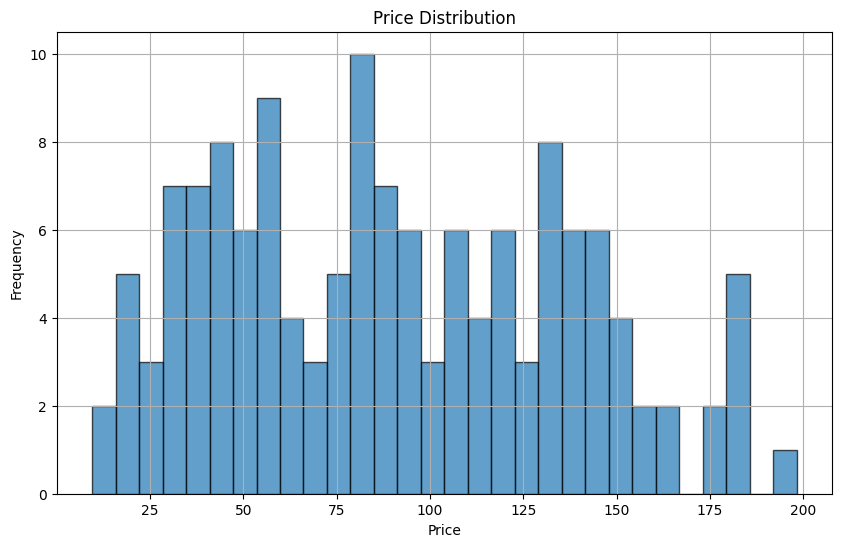

Price distribution plot saved as 'price_distribution.png'.


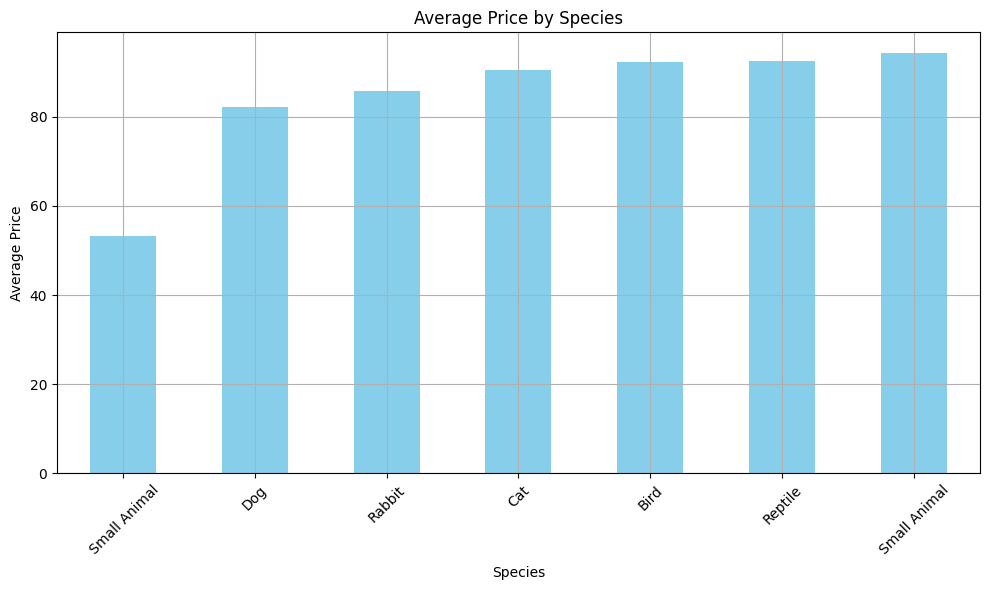

Average price by species plot saved as 'average_price_by_species.png'.


In [ ]:
import matplotlib.pyplot as plt

# Function to plot price distribution
def plot_price_distribution(df):
    plt.figure(figsize=(10, 6))
    plt.hist(df['Price'], bins=30, edgecolor='k', alpha=0.7)
    plt.title('Price Distribution')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    plt.savefig('price_distribution.png')
    plt.close()


# Function to plot average price by species
def plot_average_price_by_species(df):
    avg_price_by_species = df.groupby('Species')['Price'].mean().sort_values()
    plt.figure(figsize=(10, 6))
    avg_price_by_species.plot(kind='bar', color='skyblue')
    plt.title('Average Price by Species')
    plt.xlabel('Species')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.savefig('average_price_by_species.png')
    plt.close()



# Plot price distribution
plot_price_distribution(cleaned_df)
print("Price distribution plot saved as 'price_distribution.png'.")

# Plot average price by species
plot_average_price_by_species(cleaned_df)
print("Average price by species plot saved as 'average_price_by_species.png'.")

# Task 5: Data Visualization with Seaborn and Plotly

a) Write a function plot_price_vs_age(df) that:

b) Plots a scatter plot of price vs. age using Seaborn.

c) Save the plot as price_vs_age.png.

d) Write a function plot_age_distribution_by_species(df) that:

▪ Plots the distribution of ages for each species using a box plot with Plotly.

e) Save the plot as age_distribution_by_species.png.

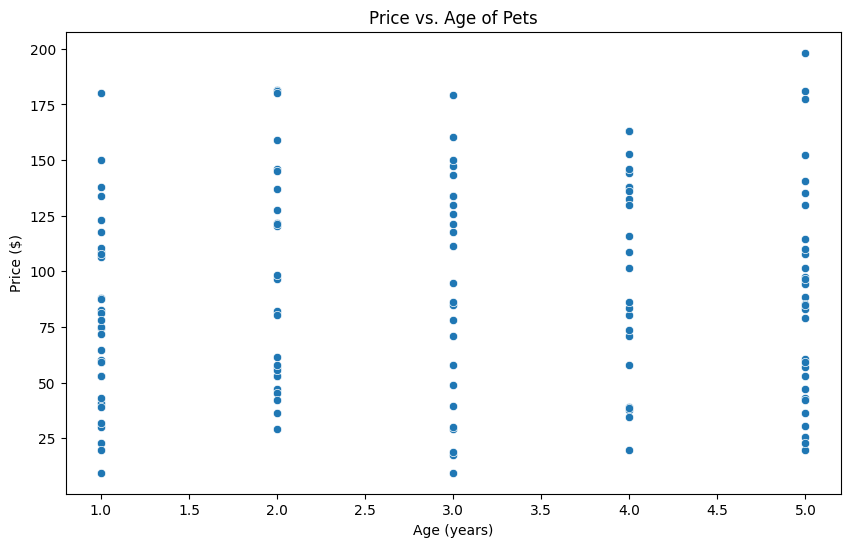

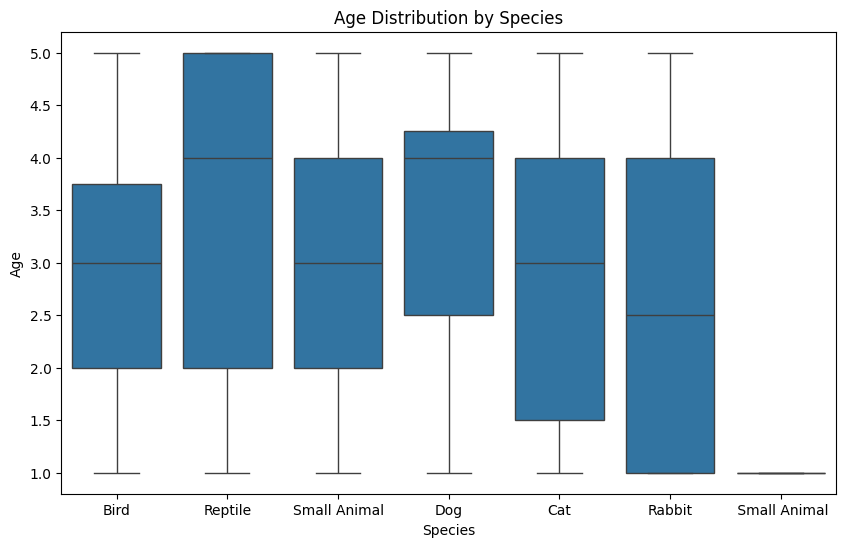

In [24]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Add the Age column
cleaned_df['Age'] = cleaned_df['Birthdate'].apply(calculate_age)

def plot_price_vs_age(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=cleaned_df, x='Age', y='Price')
    plt.title('Price vs. Age of Pets')
    plt.xlabel('Age (years)')
    plt.ylabel('Price ($)')
    plt.savefig('price_vs_age.png')
    plt.show()

# Function to plot age distribution by species using Matplotlib (alternative to Plotly)
def plot_age_distribution_by_species(df):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(x='Species', y='Age', data=df, ax=ax)
    ax.set_title('Age Distribution by Species')
    plt.savefig('age_distribution_by_species.png')
    plt.show()


plot_price_vs_age(cleaned_df)
plot_age_distribution_by_species(cleaned_df)